<a href="https://colab.research.google.com/github/SauloHenriqueAguiar/agrismartsystem/blob/main/AnaliseSensor/dadossensorPHAlto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import json

if __name__ == "__main__":

    json_file = open("/content/bancofirebasedadossensopHAlto.json")
    dic = json.load(json_file)
    print(dic)

    arr = []

    for item in dic:
        arr.append(dic[item])

    print(arr)

{'1671321008': {'humidity': '0', 'pH': '8.14', 'temperature': '26.94', 'timestamp': '1671321008'}, '1671321608': {'humidity': '0', 'pH': '8.14', 'temperature': '26.94', 'timestamp': '1671321608'}, '1671322208': {'humidity': '0', 'pH': '8.14', 'temperature': '26.94', 'timestamp': '1671322208'}, '1671322808': {'humidity': '0', 'pH': '8.14', 'temperature': '26.94', 'timestamp': '1671322808'}, '1671323409': {'humidity': '0', 'pH': '8.14', 'temperature': '26.94', 'timestamp': '1671323409'}, '1671324009': {'humidity': '0', 'pH': '8.15', 'temperature': '26.94', 'timestamp': '1671324009'}, '1671324609': {'humidity': '0', 'pH': '8.14', 'temperature': '26.94', 'timestamp': '1671324609'}, '1671325210': {'humidity': '0', 'pH': '8.14', 'temperature': '26.87', 'timestamp': '1671325210'}, '1671325810': {'humidity': '0', 'pH': '8.15', 'temperature': '26.87', 'timestamp': '1671325810'}, '1671326410': {'humidity': '0', 'pH': '8.15', 'temperature': '26.81', 'timestamp': '1671326410'}, '1671327010': {'hum

In [70]:
import pandas as pd
dfra = pd.DataFrame(columns=["humidity","pH","temperature","timestamp"])

In [71]:
for i in range(0, len(arr)):
  currentItem = arr[i]
  dfra.loc[i] = [arr[i]["humidity"], arr[i]["pH"], arr[i]["temperature"], arr[i]["timestamp"]]

In [72]:
dfra

,humidity,pH,temperature,timestamp
0,0,8.14,26.94,1671321008
1,0,8.14,26.94,1671321608
2,0,8.14,26.94,1671322208
3,0,8.14,26.94,1671322808
4,0,8.14,26.94,1671323409
...,...,...,...,...
1561,0,8.36,26.62,1672490163
1562,0,8.32,26.62,1672490707
1563,0,8.29,26.75,1672491307
1564,100,8.26,26.69,1672491908


In [73]:
print(dfra.dtypes)

humidity       object
pH             object
temperature    object
timestamp      object
dtype: object


In [74]:
dfra['timestamp'] = dfra['timestamp'].astype(int)
dfra['humidity'] = dfra['humidity'].astype(float)
dfra['pH'] = dfra['pH'].astype(float)
dfra['temperature'] = dfra['temperature'].astype(float)

In [75]:
print(dfra.dtypes)

humidity       float64
pH             float64
temperature    float64
timestamp        int64
dtype: object


In [76]:
dfra['Datetime'] = pd.to_datetime(dfra['timestamp'],
                                  unit='s')

In [77]:
dfra['Datetime']

0      2022-12-17 23:50:08
1      2022-12-18 00:00:08
2      2022-12-18 00:10:08
3      2022-12-18 00:20:08
4      2022-12-18 00:30:09
               ...        
1561   2022-12-31 12:36:03
1562   2022-12-31 12:45:07
1563   2022-12-31 12:55:07
1564   2022-12-31 13:05:08
1565   2022-12-31 13:08:36
Name: Datetime, Length: 1566, dtype: datetime64[ns]

In [78]:
dfra

,humidity,pH,temperature,timestamp,Datetime
0,0.0,8.14,26.94,1671321008,2022-12-17 23:50:08
1,0.0,8.14,26.94,1671321608,2022-12-18 00:00:08
2,0.0,8.14,26.94,1671322208,2022-12-18 00:10:08
3,0.0,8.14,26.94,1671322808,2022-12-18 00:20:08
4,0.0,8.14,26.94,1671323409,2022-12-18 00:30:09
...,...,...,...,...,...
1561,0.0,8.36,26.62,1672490163,2022-12-31 12:36:03
1562,0.0,8.32,26.62,1672490707,2022-12-31 12:45:07
1563,0.0,8.29,26.75,1672491307,2022-12-31 12:55:07
1564,100.0,8.26,26.69,1672491908,2022-12-31 13:05:08


In [79]:
## features 

features_3 = ['temperature', 'humidity', 'pH']

features = dfra[features_3]
features.index = dfra['Datetime']
features.head()

,temperature,humidity,pH
Datetime,,,
2022-12-17 23:50:08,26.94,0.0,8.14
2022-12-18 00:00:08,26.94,0.0,8.14
2022-12-18 00:10:08,26.94,0.0,8.14
2022-12-18 00:20:08,26.94,0.0,8.14
2022-12-18 00:30:09,26.94,0.0,8.14


In [80]:
features.describe()

,temperature,humidity,pH
count,1566.000000,1566.000000,1566.000000
mean,26.193001,45.402299,8.428499
std,0.555960,49.804067,0.202192
min,22.870000,0.000000,7.990000
25%,25.750000,0.000000,8.280000
50%,26.190000,0.000000,8.460000
75%,26.620000,100.000000,8.530000
max,28.060000,100.000000,8.840000


In [81]:
features.mean()

temperature    26.193001
humidity       45.402299
pH              8.428499
dtype: float64

In [82]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import os

mpl.rcParams['figure.figsize'] = (16,8)
mpl.rcParams['axes.grid'] = False

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ec8a17070>,
      dtype=object)

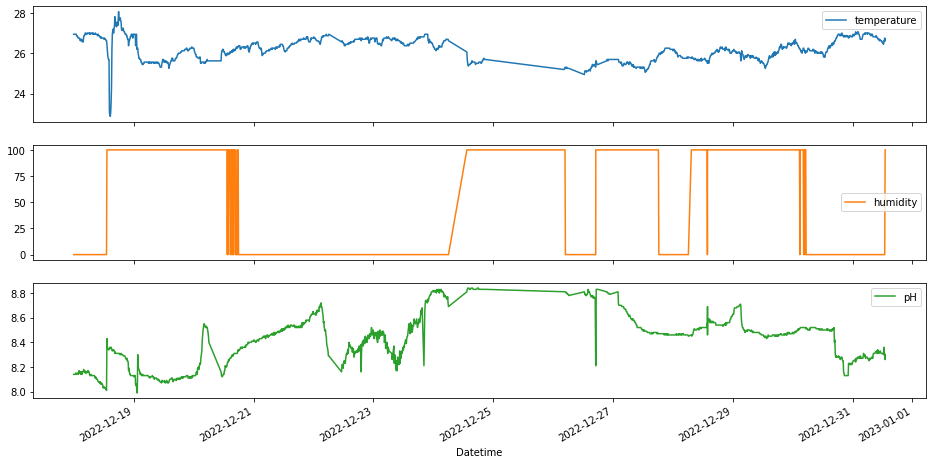

In [83]:
features.plot(subplots=True)

In [84]:
cP = features['pH']
var = np.var(cP)

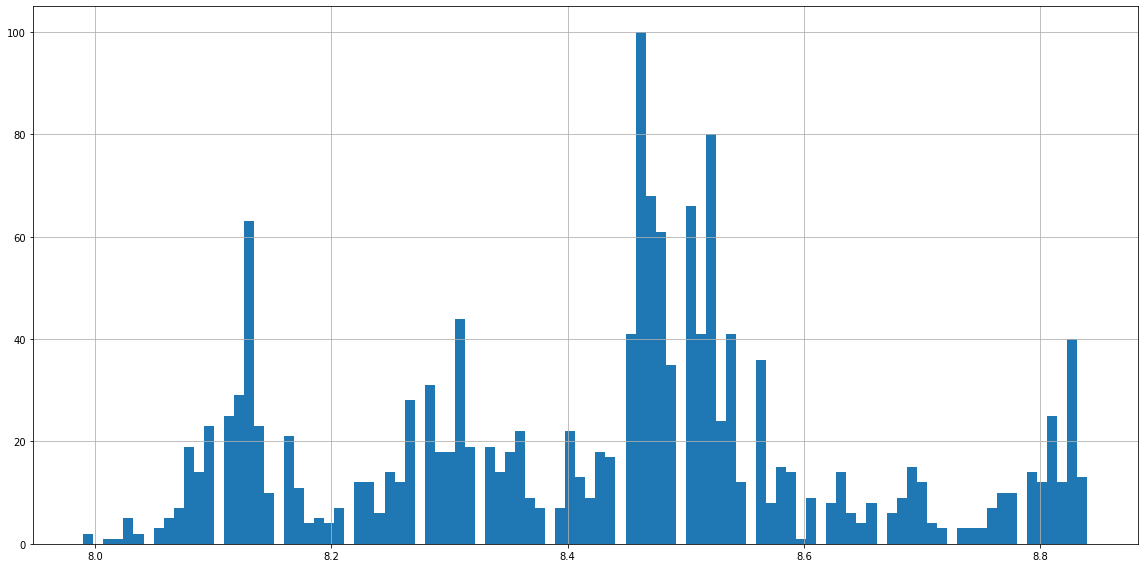

In [85]:
# Valores que aparecem no grafico de pH
features['pH'].hist(bins=100)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


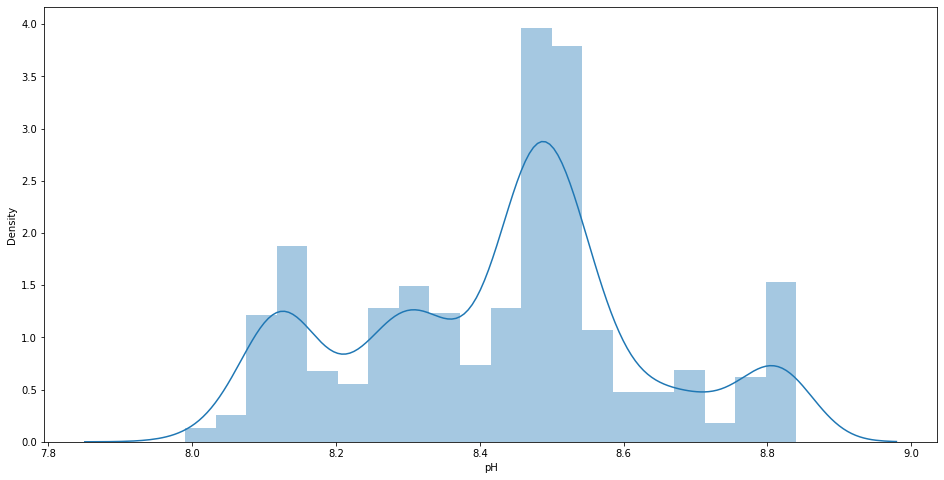

In [86]:
import seaborn as sns
sns.distplot(cP) 

In [87]:
#variancia 

print(var)

0.04085541091913245


In [88]:
#desvio padrão
des = np.std(cP)
print(des)

0.20212721469196684


In [89]:
#Assimetria (Skewness)
assimetria = cP.skew()
print('Assimetria(Skewness) ', assimetria)

Assimetria(Skewness)  0.04684726116003186


In [90]:
#Curtose (Kurtosis)
curtose = cP.kurtosis()
print('Curtose ', curtose)

Curtose  -0.5401091593453247
